# Final plotting

This notebook produces the 6-panel summary figure for the publication. Data source is the output of the analysis notebook.

The six panels are (3 cols, 2 rows):  
- N2O from soils
- N2O from manure management
- N2O from indirect sources
- Livestock counts
- N2O from bomas
- Total N2O

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import proplot as plot
import xarray as xr

In [3]:
ds = xr.open_dataset("summary.nc")
ds["total"] = ds.manure + ds.indirect + ds.soil
ds["total_boma"] = ds.total + ds.booma
ds["total_relchange"] = ((ds.total_boma / ds.total)-1.0)*100
ds["total_abschange"] = ds.total_boma - ds.total

In [4]:
colors = 'sunset'
colors_ls = 'marine' #'Purples' #'RdPu'
VMAX = 3.5
LEVELS=[0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5]

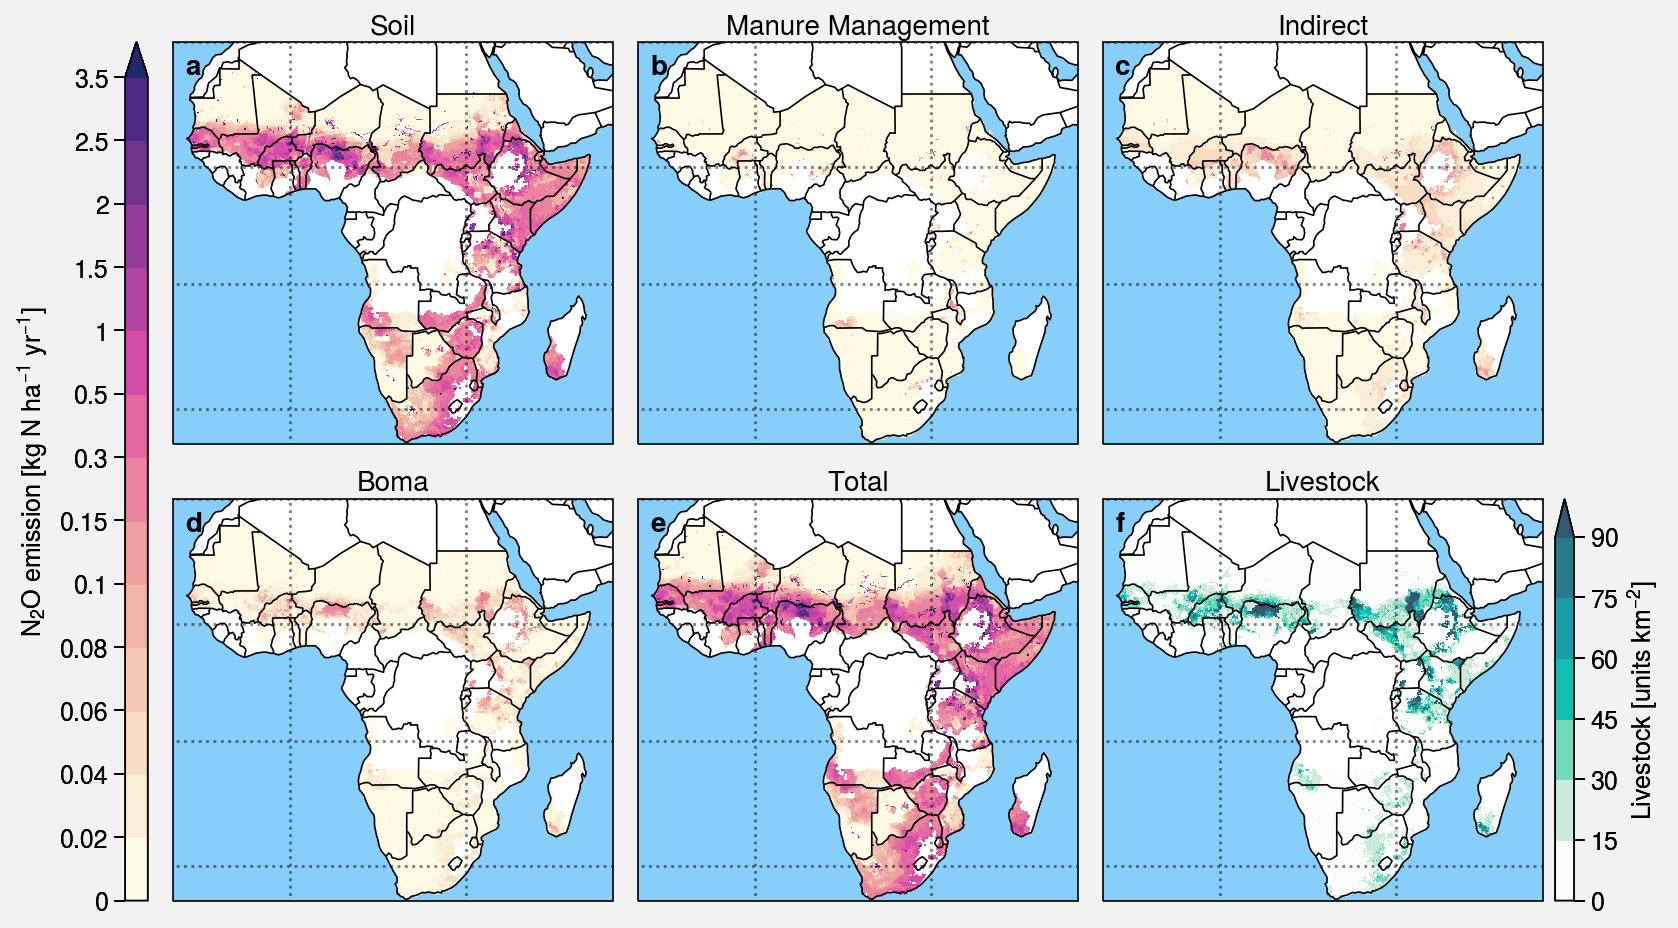

In [5]:
f, axs = plot.subplots(nrows=2, ncols=3, axwidth=2.2, proj='merc', share=3)

axs.format(abc=True, 
           abcloc='ul',
           abcborder=False)

# top row
for i, var in enumerate(['soil', 'manure', 'indirect', 'booma', 'total_boma']):
    # soil emissions
    m = axs[i].pcolormesh(
        ds[var].where(ds[var] >- 1), 
        cmap=colors, 
        vmin=0, vmax=VMAX, levels=LEVELS,
        extend='max',
        linewidth=0.7, #color='gray7'
    )

# livestock units
axs[-1].pcolormesh(
    ds.livestock.where(ds.livestock >- 1),
    cmap=colors_ls,
    colorbar='r', 
    linewidth=0.7,
    cmap_kw={'right': 0.8},
    colorbar_kw={'label': 'Livestock [units km$^{-2}$]', 'width': '0.75em'}, 
    vmin=0, vmax=90, levels=[0, 15, 30, 45, 60, 75, 90],
    extend='max',
)

labels = ["Soil", "Manure Management", "Indirect", "Boma", "Total", "Livestock"]
for i in range(6):
    axs[i].format(
        title=labels[i],
        lonlim=(-20, 55), latlim=(-35, 30),
        borders=True,
        coast=True,
        ocean=True,
        oceancolor='lightskyblue',
        #facecolor='whitesmoke'
    )
f.colorbar(m, loc='l', label='N$_2$O emission [kg N ha$^{-1}$ yr$^{-1}$]', width='0.9em');

In [6]:
f.savefig("panelplot.png", dpi=400, facecolor='w')

# done ...

## Live stock units

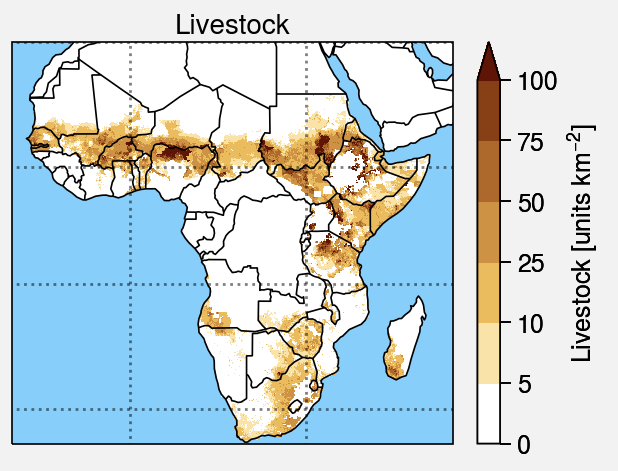

In [8]:
f, ax = plot.subplots(axwidth=2.2, proj='merc')
m= ax.pcolormesh(
       ds.livestock.where(ds.livestock >- 1), 
       cmap='stellar',
       cmap_kw={'right': 0.8},
       vmin=0, vmax=100, levels=[0, 5, 10, 25, 50, 75, 100],
       extend='max',
       linewidth=0.7,
)
ax.format(
    title='Livestock',
    lonlim=(-20, 55), latlim=(-35, 30),
    borders=True,
    coast=True,
    ocean=True,
    oceancolor='lightskyblue'
)
f.colorbar(m, loc='r', label='Livestock [units km$^{-2}$]', width='0.9em');    

In [9]:
f.savefig("livestockunits.png", dpi=600, facecolor='w')